In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# more details about the dataset in this link https://archive.ics.uci.edu/ml/datasets/auto+mpg
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\DTE-LAPC-128-21\\.keras\\datasets\\auto-mpg.data'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Prepare the data

In [6]:
# Prepare the data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [8]:
dataset = dataset.drop_duplicates()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [9]:
# The "Origin" column is really categorical, not numeric. So convert that to a one-hot
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA


In [10]:
# one-hot encoding
dataset = pd.get_dummies(dataset, prefix='Origin', prefix_sep='_')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [11]:
dataset['Model Year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [12]:
dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin_Europe', 'Origin_Japan',
       'Origin_USA'],
      dtype='object')

In [13]:
dataset.shape

(392, 10)

In [14]:
# Split the data into train (80%) and test (%20)
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [15]:
train_dataset.shape , test_dataset.shape

((314, 10), (78, 10))

In [16]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Origin_Europe,392.0,0.173469,0.379136,0.0,0.000,0.00,0.000,1.0
Origin_Japan,392.0,0.201531,0.401656,0.0,0.000,0.00,0.000,1.0
Origin_USA,392.0,0.625000,0.484742,0.0,0.000,1.00,1.000,1.0


In [17]:
norm_cols = ['Displacement', 'Horsepower', 'Weight', 'Acceleration']

train_stats = train_dataset[norm_cols].describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8


# self study :
- Handle "Model Year" feature
- Try transformer for feature engineering

In [18]:
#  Split features from labels (miles per gallon= MPG)
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# normalize the data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

train_dataset[norm_cols] = norm(train_dataset[norm_cols])
test_dataset[norm_cols] = norm(test_dataset[norm_cols])

In [19]:
train_dataset

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
146,4,-1.009459,-0.784052,-1.025303,-0.379759,74,0,0,1
282,4,-0.530218,-0.442811,-0.118796,0.624102,79,0,0,1
69,8,1.482595,1.447140,1.736877,-0.738281,72,0,0,1
378,4,-0.865687,-1.099044,-1.025303,-0.308055,82,0,0,1
331,4,-0.942365,-0.994047,-1.001603,0.875068,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,0.044872,-0.521559,-0.000298,0.946772,79,0,0,1
229,8,1.961837,1.972127,1.457223,-1.598734,77,0,0,1
150,4,-0.836932,-0.311564,-0.710099,-0.021237,74,0,1,0
145,4,-1.076553,-1.151543,-1.169870,1.233589,74,0,1,0


In [20]:
normed_train_data = train_dataset.copy()
normed_test_data = test_dataset.copy()

In [21]:
normed_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707e+00,1.699788,3.000000,4.000000,4.000000,8.000000,8.000000
Displacement,314.0,8.627211e-17,1.000000,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Horsepower,314.0,-9.900078e-18,1.000000,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Weight,314.0,-8.485781e-17,1.000000,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Acceleration,314.0,-5.148041e-16,1.000000,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Model Year,314.0,7.589809e+01,3.675642,70.000000,73.000000,76.000000,79.000000,82.000000
Origin_Europe,314.0,1.783439e-01,0.383413,0.000000,0.000000,0.000000,0.000000,1.000000
Origin_Japan,314.0,1.974522e-01,0.398712,0.000000,0.000000,0.000000,0.000000,1.000000
Origin_USA,314.0,6.242038e-01,0.485101,0.000000,0.000000,1.000000,1.000000,1.000000


## Build the ANN model

In [22]:
train_dataset.shape[1], len(train_dataset.keys())

(9, 9)

In [23]:
def build_model(activation, input_shape=train_dataset.shape[1], output_shape=1):
  model = keras.Sequential([
    layers.Dense(50, activation=activation, input_shape=[input_shape]),
    layers.Dense(50, activation=activation),
    layers.Dense(50, activation=activation),
    layers.Dense(50, activation=activation),
    layers.Dense(output_shape)])

  # if there is no activation fuction in dense layer. then it will return sum of (weight * features + bias)
  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [24]:
import warnings
warnings.filterwarnings('ignore')

Epoch 1/100
9/9 [==============================] - 2s 56ms/step - loss: 532.1529 - mae: 21.7711 - mse: 532.1529 - val_loss: 538.3107 - val_mae: 21.5805 - val_mse: 538.3107
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 527.2770 - mae: 21.6613 - mse: 527.2770 - val_loss: 534.2233 - val_mae: 21.4855 - val_mse: 534.2233
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 523.3809 - mae: 21.5710 - mse: 523.3809 - val_loss: 530.5433 - val_mae: 21.3997 - val_mse: 530.5433
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 519.7412 - mae: 21.4862 - mse: 519.7412 - val_loss: 526.9761 - val_mae: 21.3162 - val_mse: 526.9761
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 516.1758 - mae: 21.4032 - mse: 516.1758 - val_loss: 523.4538 - val_mae: 21.2334 - val_mse: 523.4538
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 512.6436 - mae: 21.3205 - mse: 512.6436 - val_loss: 519.9474 - val_mae

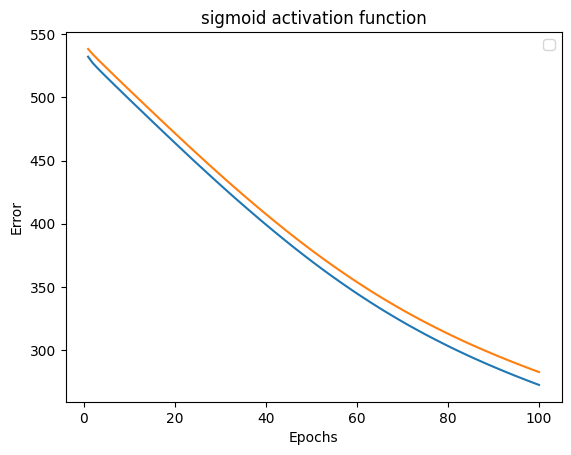

3/3 [==============================] - 0s 4ms/step - loss: 298.9937 - mae: 15.2869 - mse: 298.9937
Epoch 1/100
9/9 [==============================] - 1s 66ms/step - loss: 544.7538 - mae: 22.0345 - mse: 544.7538 - val_loss: 502.1600 - val_mae: 20.7115 - val_mse: 502.1600
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 465.5195 - mae: 20.1795 - mse: 465.5195 - val_loss: 443.1420 - val_mae: 19.2615 - val_mse: 443.1420
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 412.6505 - mae: 18.8447 - mse: 412.6505 - val_loss: 396.3847 - val_mae: 18.0139 - val_mse: 396.3847
Epoch 4/100
9/9 [==============================] - 0s 18ms/step - loss: 367.7580 - mae: 17.6094 - mse: 367.7580 - val_loss: 353.5835 - val_mae: 16.7964 - val_mse: 353.5835
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 325.5509 - mae: 16.4144 - mse: 325.5509 - val_loss: 312.9157 - val_mae: 15.5469 - val_mse: 312.9157
Epoch 6/100
9/9 [=========================

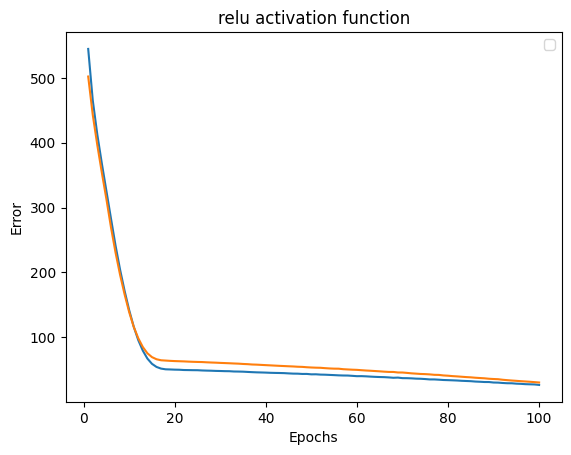

3/3 [==============================] - 0s 6ms/step - loss: 26.8129 - mae: 4.2451 - mse: 26.8129
Epoch 1/100
9/9 [==============================] - 2s 57ms/step - loss: 439.4171 - mae: 19.4522 - mse: 439.4171 - val_loss: 380.2929 - val_mae: 17.5179 - val_mse: 380.2929
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 335.0186 - mae: 16.6316 - mse: 335.0186 - val_loss: 304.5186 - val_mae: 15.2008 - val_mse: 304.5186
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 266.8584 - mae: 14.4585 - mse: 266.8584 - val_loss: 244.6876 - val_mae: 13.0936 - val_mse: 244.6876
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 211.2054 - mae: 12.3594 - mse: 211.2054 - val_loss: 194.5638 - val_mae: 11.1138 - val_mse: 194.5638
Epoch 5/100
9/9 [==============================] - 0s 21ms/step - loss: 163.1593 - mae: 10.4066 - mse: 163.1593 - val_loss: 152.0900 - val_mae: 9.4831 - val_mse: 152.0900
Epoch 6/100
9/9 [============================

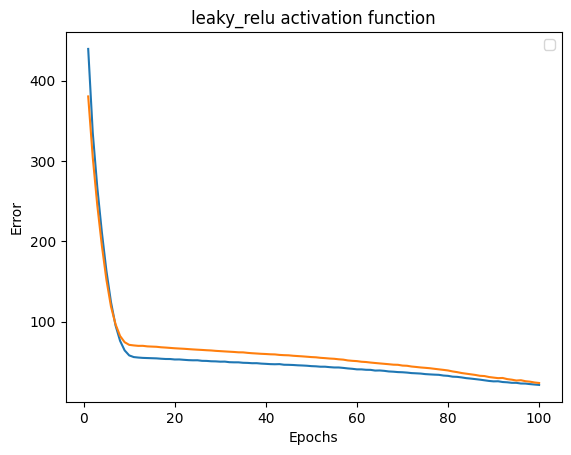

3/3 [==============================] - 0s 6ms/step - loss: 20.8790 - mae: 3.6131 - mse: 20.8790
Epoch 1/100
9/9 [==============================] - 1s 29ms/step - loss: 589.8412 - mae: 23.0475 - mse: 589.8412 - val_loss: 581.0293 - val_mae: 22.5285 - val_mse: 581.0293
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 562.4926 - mae: 22.4469 - mse: 562.4926 - val_loss: 559.1987 - val_mae: 22.0412 - val_mse: 559.1987
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 542.0502 - mae: 21.9836 - mse: 542.0502 - val_loss: 540.4628 - val_mae: 21.6144 - val_mse: 540.4628
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 523.7209 - mae: 21.5688 - mse: 523.7209 - val_loss: 522.8529 - val_mae: 21.2058 - val_mse: 522.8529
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 506.4305 - mae: 21.1676 - mse: 506.4305 - val_loss: 506.3121 - val_mae: 20.8149 - val_mse: 506.3121
Epoch 6/100
9/9 [==============================]

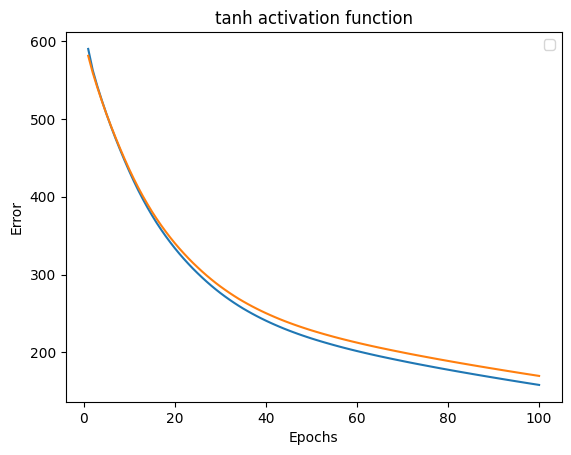

3/3 [==============================] - 0s 3ms/step - loss: 178.7215 - mae: 10.9248 - mse: 178.7215
Epoch 1/100
9/9 [==============================] - 1s 38ms/step - loss: 579.9995 - mae: 22.8058 - mse: 579.9995 - val_loss: 518.8493 - val_mae: 21.0585 - val_mse: 518.8493
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 471.4310 - mae: 20.2891 - mse: 471.4310 - val_loss: 433.8467 - val_mae: 18.9481 - val_mse: 433.8467
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 391.8172 - mae: 18.2458 - mse: 391.8172 - val_loss: 361.8566 - val_mae: 16.9647 - val_mse: 361.8566
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 323.9335 - mae: 16.3003 - mse: 323.9335 - val_loss: 300.6357 - val_mae: 15.0804 - val_mse: 300.6357
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 267.1505 - mae: 14.4414 - mse: 267.1505 - val_loss: 250.5703 - val_mae: 13.3442 - val_mse: 250.5703
Epoch 6/100
9/9 [===========================

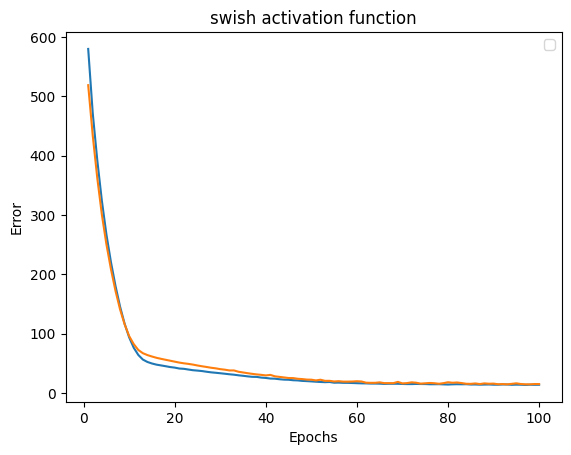

3/3 [==============================] - 0s 4ms/step - loss: 12.2530 - mae: 2.3815 - mse: 12.2530


In [25]:
activations = {
    'sigmoid': 'sigmoid',
    'relu':'relu',
    'leaky_relu':'leaky_relu',
    'tanh':'tanh',
    'swish':'swish'    
}
activation_list, mae_list, mse_list = [],[],[]
EPOCHS = 100


for key, value in activations.items():
    activation_list.append(key)
    #print(activation)
    model = build_model(activation=value)

    history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.1, verbose=1)
    
    sns.lineplot(x= range(1, EPOCHS+1), y=history.history['mse'])
    sns.lineplot(x=range(1, EPOCHS+1), y=history.history['val_mse'])
    plt.title("{} activation function".format(key))
    plt.xlabel("Epochs")
    plt.ylabel('Error')
    plt.legend('mae','mse')
    plt.show()

    # evaluations
    loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=1)
    mae_list.append(mae)
    mse_list.append(mse)   

In [26]:
df = pd.DataFrame()
df['activation'] = activation_list
df['mae'] = mae_list
df['mse'] = mse_list
df

,activation,mae,mse
0,sigmoid,15.286906,298.993744
1,relu,4.245076,26.812876
2,leaky_relu,3.613116,20.878981
3,tanh,10.924796,178.721542
4,swish,2.381533,12.252972
